# Gradient descent vs Newton Raphson

This compares these two popular methods for solving non-linear equations.

We have a function $F(x)=x^2-4$. For gradient-descent, we cast the problem as the minimisation of the cost function $J(x)=\frac{1}{2}\lVert{F(x)-0}\Vert^2$. But because we are cheap we know that is the same as minimising $J(x)=F(x)^2$ Its gradient is thus $\nabla J(x)=\frac{1}{2}F(x)\nabla f(x)$

In [243]:
import numpy as np
import matplotlib.pyplot as plt
h=1e-6 
nit=10
def gradient(func,x):
    #f(x+h)-f(x-h) /2h
    #return (func(x+h)-func(x-h))/(2*h)
    return 2.0*x

def func(x):
    return np.square(x)

def gradient_descent(func,x,alpha):
    x_full=[x]
    #Minimise distance to zero
    for i in range(nit):
        x-=alpha*func(x)*gradient(func,x)  
        x_full.append(x)
    return x,x_full

def newton_raphson(func,x):
    x_full=[x]
    for i in range(nit):
        x-=func(x)/gradient(func,x)
        x_full.append(x)
    return x,x_full

Final solution and cost of Gradient descent:: 1.914218
Final solution and cost of Newton-Raphson: 0.004883


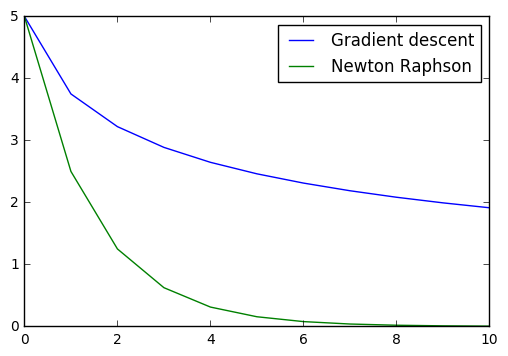

In [257]:
x,x_full=gradient_descent(func,5,0.005)
x2,x2_full=newton_raphson(func,5)
print("Final solution and cost of Gradient descent:: %f" %x)
print("Final solution and cost of Newton-Raphson: %f"%x2)
#x_full=np.array(x_full)
its=np.arange(nit+1)
plt.plot(its,x_full)
plt.plot(its,x2_full)
plt.legend(('Gradient descent','Newton Raphson'))
plt.show()


Thus, Gradient-descent is ridiculously inefficient for solving systems like this in 1D.
Let's now try 2D. $F(x,y)=x^2+y^2-4$. This is still a scalar function.

In [228]:
h=1e-6 
nit=14
start=np.array([1.,10.])
x_full_sys=np.array(start)
def gradient(x_loc,limit=False):
    #f(x+h)-f(x-h) /2h
    #return (func(x+h)-func(x-h))/(2*h)
        grad=np.array(2.0*x_loc,dtype='float64')
        if limit==False:
            return grad
        else:
            larger=np.abs(grad)>2
            grad[larger]=np.sign(grad[larger])*2
            return grad
        

def func(x):
     if x.ndim==1:
        return np.square(x).sum()-4
     else:
        return np.square(x).sum(axis=1)-4
    
def cost(x):
    return np.square(func(x))


def acc(xp):
    global x_full_sys
    x_full_sys=np.vstack((x_full_sys,xp))
    return 0
def norm(x):
    return np.sqrt(x.dot(x))

def gradient_descent(func,start,alpha):
    x_full=np.array(start)
    x=np.array(start)
    #Minimise distance to zero
    for i in range(nit):
        x-=alpha*func(x)*gradient(x,limit=True) 
        x_full=np.vstack((x_full,x))
    return x,x_full

def newton_raphson(func,start,gamma):
    x_full=np.array(start)
    x=np.array(start)
    for i in range(nit):
        x-=gamma*func(x)/gradient(x,limit=True)
        x_full=np.vstack((x_full,x))
    return x,x_full

In [229]:
import scipy.optimize

a=scipy.optimize.minimize(cost,start,callback=acc)
nit_a=a.nit
x_sys=a.x
a

      fun: 4.179980941706262e-16
 hess_inv: array([[ 0.01117808, -0.00253108],
       [-0.00253108,  0.03091724]])
      jac: array([  2.31504630e-08,   7.25919519e-08])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 14
     njev: 16
   status: 0
  success: True
        x: array([-0.24081525,  1.98544907])

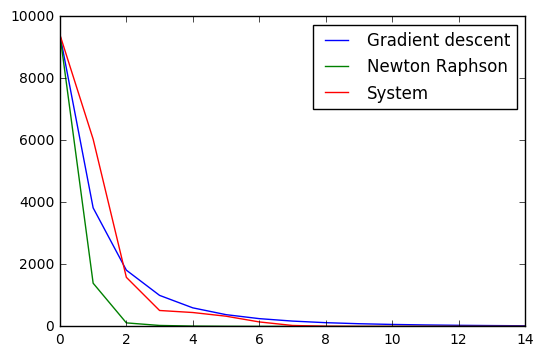

Final solution and cost of Newton-Raphson: 0.008065 [-0.56198947  1.94267232]
Final solution and cost of Gradient descent: 21.721909 [  6.80586738e-04   2.94290271e+00]
Final solution and cost of Minimize: 0.000000 [-0.24081525  1.98544907]


In [241]:
x,x_full=gradient_descent(func,start,0.01)
x2,x2_full=newton_raphson(func,start,0.1)
its=np.arange(nit+1)
its_sys=np.arange(nit_a+1)

plt.plot(its,cost(x_full))
plt.plot(its,cost(x2_full))
plt.plot(its_sys,cost(x_full_sys))
plt.legend(('Gradient descent','Newton Raphson','System'))
plt.show()

print("Final solution and cost of Newton-Raphson: %f" %cost(x2),x2)
print("Final solution and cost of Gradient descent: %f"%cost(x),x)
print("Final solution and cost of Minimize: %f"%cost(x_sys),x_sys)

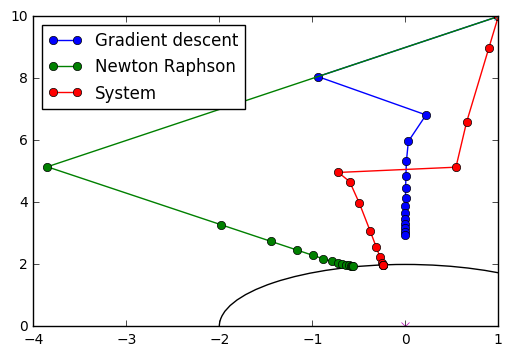

In [242]:
plt.plot(x_full[:,0],x_full[:,1],marker='o')
plt.plot(x2_full[:,0],x2_full[:,1],marker='o')
plt.plot(x_full_sys[:,0],x_full_sys[:,1],marker='o')
plt.plot(start[0],start[1], marker='x',linestyle='None')
plt.plot(0,0, marker='x',linestyle='None')
circle=plt.Circle(((0,0)), radius=2,fill=False)
plt.gca().add_patch(circle)
plt.legend(('Gradient descent','Newton Raphson','System'),loc=0)

plt.show()

Seemingly, then, as much as I like NR, the pre-made solvers behave much better.
The pre-made solver, furthermore, does not require special finetuning of parameters like my $\gamma=0.01$ and $\alpha=0.1$ that I used